# Reading the data

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [101]:
df=pd.read_csv("data.csv")

In [102]:
df.shape

(891, 12)

In [103]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [104]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Variable Identification

In [105]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Univariate analysis of continuous variables

In [106]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


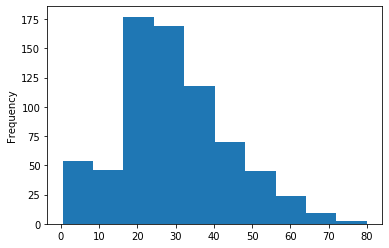

In [107]:
df['Age'].plot.hist()

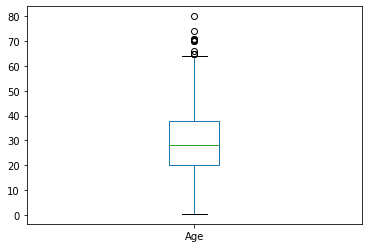

In [108]:
df['Age'].plot.box()

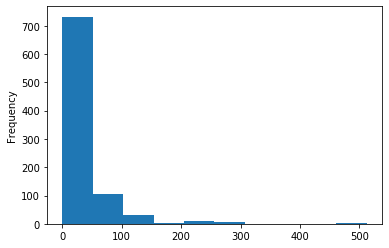

In [109]:
df['Fare'].plot.hist()

# Univariate analysis of categorical variables

In [110]:
#creating frequency table for variable sex

df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [111]:
#creating percentage from frequencies 

df['Sex'].value_counts()/len(df['Sex'])

male      0.647587
female    0.352413
Name: Sex, dtype: float64

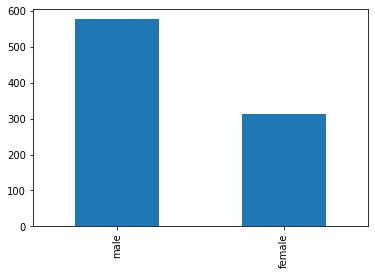

In [112]:
#create a bar plot for sex frequencies

df['Sex'].value_counts().plot.bar()

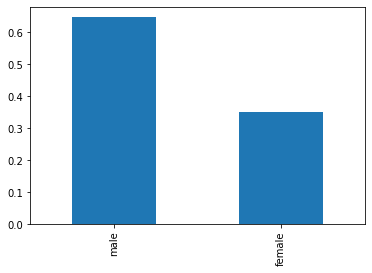

In [113]:
#creating percentage of males and females

(df['Sex'].value_counts()/len(df['Sex'])).plot.bar()

# Continuous - Continuous Bivariate Analysis

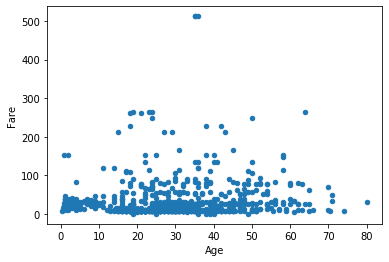

In [114]:
df.plot.scatter('Age','Fare')

In [115]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [116]:
df['Age'].corr(df['Fare'])

0.0960666917690389

# Categorical - Continuous Bivariate Analysis


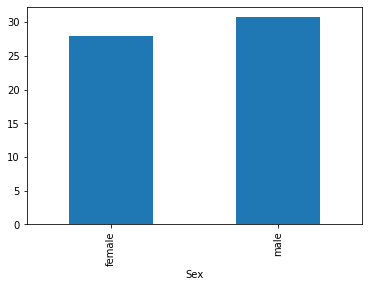

In [117]:
df.groupby('Sex')['Age'].mean().plot.bar()

In [118]:
#importin the scipy library for ttest

from scipy.stats import ttest_ind

In [119]:
male=df[df['Sex']=='male']
male.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [120]:
female=df[df['Sex']=='female']
female.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [121]:
ttest_ind(male['Age'],female['Age'],nan_policy='omit')

Ttest_indResult(statistic=2.499206354920835, pvalue=0.012671296797014266)

# Categorical - Categorical Bivariate Analysis

In [122]:
pd.crosstab(df['Sex'],df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [123]:
from scipy.stats import chi2_contingency

In [124]:
chi2_contingency(pd.crosstab(df['Sex'],df['Survived']))

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

# identifying missing values 

In [125]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [126]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [127]:
#dropping all rows where there are any missing values

df.dropna().isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [152]:
#dropping all the rows where alll the entries are missing

df.dropna(how='all').shape

(888, 10)

In [153]:
#dropping columns with any missing values 

df.dropna(axis=1).shape

(888, 10)

In [154]:
df.dropna(axis=1, how='all').shape

(888, 10)

In [155]:
df['Age'].fillna(0).head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [156]:
#Imputed with mean for continuous variable
df['Age'].fillna(df['Age'].mean(),inplace=True)


In [146]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          686
Embarked         2
type           177
dtype: int64

# Univariate outlier detection

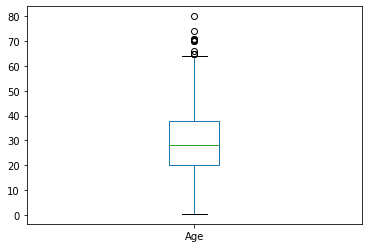

In [134]:
df['Age'].plot.box()

# Bivariate outlier detection

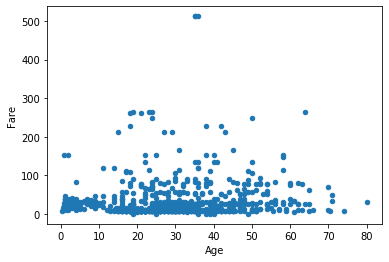

In [135]:
df.plot.scatter('Age', 'Fare')

# Removing outlier from the dateset

In [136]:
df=df[df['Fare']<300]

# Replacing outlier in age with the mean age value

In [137]:
df.loc[df['Age']>65, 'Age']=np.mean(df['Age'])

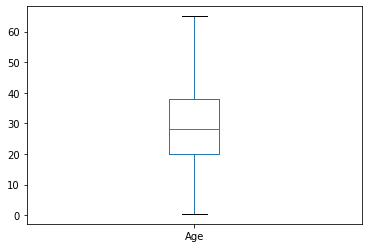

In [138]:
df['Age'].plot.box()

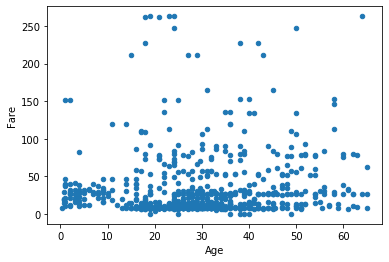

In [139]:
df.plot.scatter('Age', 'Fare')

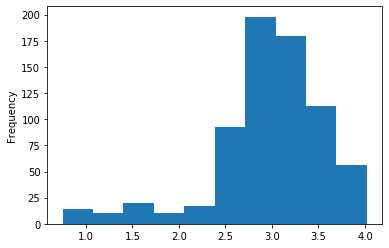

In [140]:
np.power(df['Age'],1/3).plot.hist()

In [141]:
bins=[0,15,80]

group=['children', 'Adult']

In [158]:
df['type']=pd.cut(df['Age'],bins,labels=group,)

In [159]:
df['type'].value_counts()

Adult       805
children     83
Name: type, dtype: int64